In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



#for visualization purposes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
!pip install laspy==1.7.0
import laspy
inFile = laspy.file.File('pointcloud.las', mode='r')

In [3]:
inFile.points

array([((626539, 858531,  -466,  447, 17,   0, 2, 6, -4500, 112, 2.70106747e+08, 48128, 47616, 44544, 4., -10.26000023,  4.46999979),),
       ((626500, 857813,  -472,  474, 34,   0, 2, 6, -4500, 112, 2.70106747e+08, 49408, 49408, 46336, 8., -10.        ,  4.73999977),),
       ((626633, 858063,  -407,  458, 17,   0, 2, 6, -4500, 112, 2.70106747e+08, 49664, 49664, 46592, 4., -10.13000011,  4.57999992),),
       ...,
       ((626063, 736938,  -973,  822, 17, 192, 1, 7, -4833, 113, 2.70107390e+08, 17408, 19200, 17152, 6.,  -5.76000023,  8.22000027),),
       ((625938, 737156, -1120, 1025, 17,  64, 2, 7, -4833, 113, 2.70107390e+08, 17152, 18432, 16896, 2.,  -3.73000002, 10.25      ),),
       ((625914, 736750, -1097, 1032, 17, 192, 2, 7, -4833, 113, 2.70107390e+08, 15104, 16384, 14848, 9.,  -3.6500001 , 10.31999969),)],
      dtype=[('point', [('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('flag_byte', 'u1'), ('classification_flags', 'u1'), ('classification_byte', 'u1'),

In [4]:
classification = inFile.classification

In [5]:
classification

array([2, 2, 2, ..., 1, 2, 2], dtype=uint8)

In [6]:
classification = classification.transpose()

In [7]:
points = np.vstack((inFile.X,inFile.Y,inFile.Z)).transpose()

In [8]:
points

array([[626539, 858531,   -466],
       [626500, 857813,   -472],
       [626633, 858063,   -407],
       ...,
       [626063, 736938,   -973],
       [625938, 737156,  -1120],
       [625914, 736750,  -1097]])

In [9]:
colors = np.vstack((inFile.Red,inFile.Blue,inFile.Green)).transpose()

In [10]:
colors

array([[48128, 44544, 47616],
       [49408, 46336, 49408],
       [49664, 46592, 49664],
       ...,
       [17408, 17152, 19200],
       [17152, 16896, 18432],
       [15104, 14848, 16384]], dtype=uint16)

In [11]:
colors = colors/65535

In [12]:
colors

array([[0.73438621, 0.67969787, 0.72657359],
       [0.75391775, 0.70704204, 0.75391775],
       [0.75782406, 0.71094835, 0.75782406],
       ...,
       [0.26562905, 0.26172274, 0.29297322],
       [0.26172274, 0.25781643, 0.28125429],
       [0.23047227, 0.22656596, 0.25000381]])

In [13]:
dataset = pd.DataFrame(points,columns=['X','Y','Z'])

In [14]:
dataset['R'] = colors[:,0]
dataset['G'] = colors[:,1]
dataset['B'] = colors[:,2]
dataset['Classification'] = inFile.classification

In [15]:
dataset

,X,Y,Z,R,G,B,Classification
0,626539,858531,-466,0.734386,0.679698,0.726574,2
1,626500,857813,-472,0.753918,0.707042,0.753918,2
2,626633,858063,-407,0.757824,0.710948,0.757824,2
3,626773,858344,-436,0.738293,0.691417,0.738293,2
4,626500,857219,-407,0.617197,0.574228,0.625010,2
...,...,...,...,...,...,...,...
3402221,626117,737469,-910,0.218753,0.214847,0.246098,1
3402222,625992,737656,-1083,0.265629,0.261723,0.285161,2
3402223,626063,736938,-973,0.265629,0.261723,0.292973,1
3402224,625938,737156,-1120,0.261723,0.257816,0.281254,2


In [16]:
dataset.Classification.unique()

array([ 2,  1,  6,  9, 26], dtype=uint8)

In [17]:
dataset['Classification'] = dataset['Classification'].replace([2,1,6,9,26],[0,1,2,3,4])
dataset.Classification.unique()

array([0, 1, 2, 3, 4], dtype=uint8)

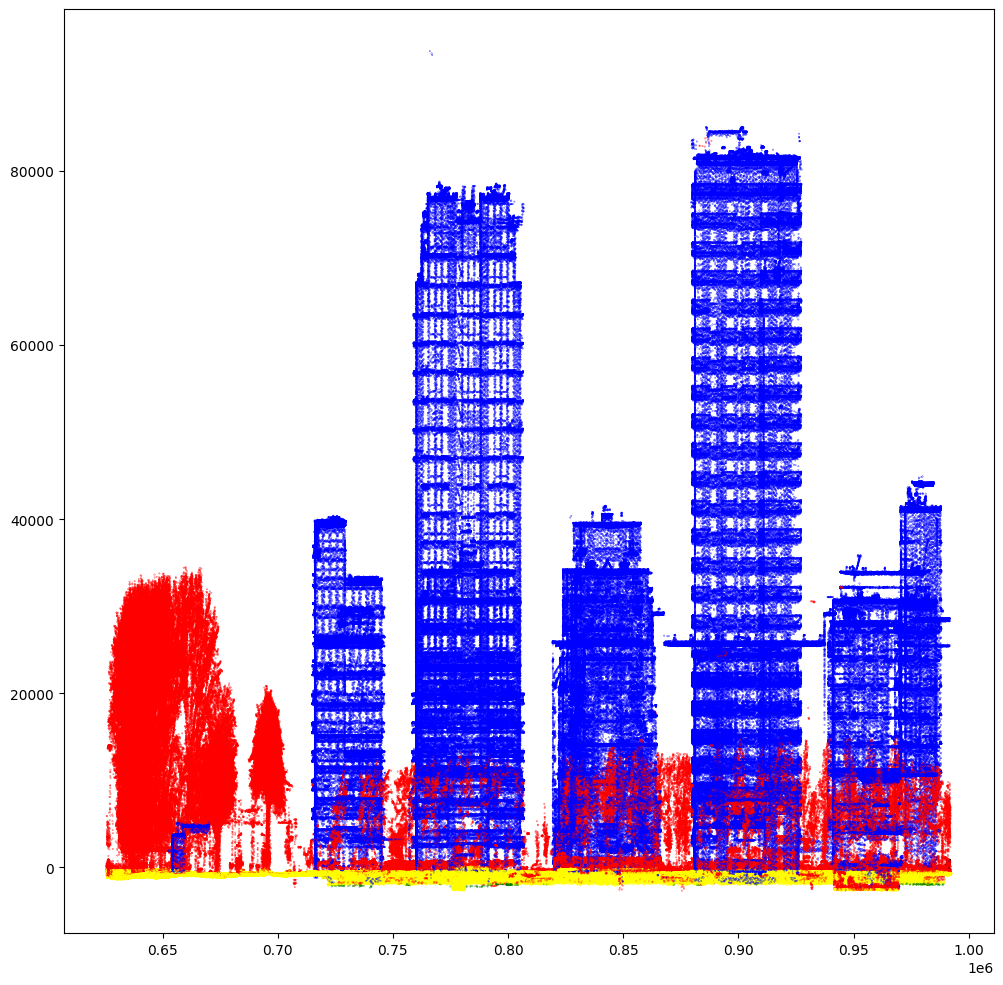

In [18]:
colors = {0:'yellow',1:'red',2:'blue',3:'green',4:'black'}
plt.figure(figsize=(12,12))
plt.scatter(dataset['X'],dataset['Z'],c=dataset['Classification'].map(colors),s=0.05)
plt.show()

CPU times: total: 3.92 s
Wall time: 3.95 s


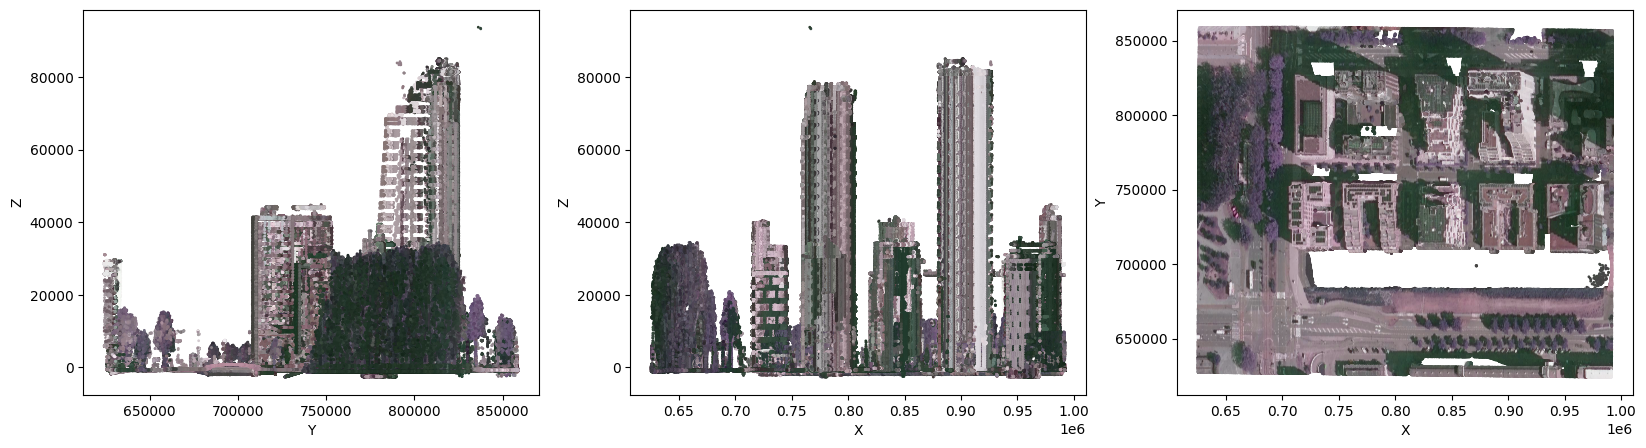

In [19]:
%%time
fig, m_axs = plt.subplots(1, 3, figsize = (20, 5))
ax_names = 'XYZ'
for i, c_ax in enumerate(m_axs.flatten()):
    plot_axes = [x for j, x in enumerate(ax_names) if j!=i]
    c_ax.scatter(dataset[plot_axes[0]],
                dataset[plot_axes[1]],
                c=dataset[['R', 'G', 'B']].values,
                 s=1
                )
    c_ax.set_xlabel(plot_axes[0])
    c_ax.set_ylabel(plot_axes[1])

In [20]:
dataset

,X,Y,Z,R,G,B,Classification
0,626539,858531,-466,0.734386,0.679698,0.726574,0
1,626500,857813,-472,0.753918,0.707042,0.753918,0
2,626633,858063,-407,0.757824,0.710948,0.757824,0
3,626773,858344,-436,0.738293,0.691417,0.738293,0
4,626500,857219,-407,0.617197,0.574228,0.625010,0
...,...,...,...,...,...,...,...
3402221,626117,737469,-910,0.218753,0.214847,0.246098,1
3402222,625992,737656,-1083,0.265629,0.261723,0.285161,0
3402223,626063,736938,-973,0.265629,0.261723,0.292973,1
3402224,625938,737156,-1120,0.261723,0.257816,0.281254,0


In [21]:
X = dataset.iloc[:,0:-1].values

In [22]:
X

array([[ 6.26539000e+05,  8.58531000e+05, -4.66000000e+02,
         7.34386206e-01,  6.79697871e-01,  7.26573587e-01],
       [ 6.26500000e+05,  8.57813000e+05, -4.72000000e+02,
         7.53917754e-01,  7.07042039e-01,  7.53917754e-01],
       [ 6.26633000e+05,  8.58063000e+05, -4.07000000e+02,
         7.57824063e-01,  7.10948348e-01,  7.57824063e-01],
       ...,
       [ 6.26063000e+05,  7.36938000e+05, -9.73000000e+02,
         2.65629053e-01,  2.61722744e-01,  2.92973220e-01],
       [ 6.25938000e+05,  7.37156000e+05, -1.12000000e+03,
         2.61722744e-01,  2.57816434e-01,  2.81254292e-01],
       [ 6.25914000e+05,  7.36750000e+05, -1.09700000e+03,
         2.30472267e-01,  2.26565957e-01,  2.50003815e-01]])

In [23]:
y = dataset.iloc[:,-1].values

In [24]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
print(X_train.shape)
print(X_test.shape)

(2721780, 6)
(680446, 6)


In [27]:
X_train = X_train.reshape(X_train.shape[0], 6,1)

X_test = X_test.reshape(X_test.shape[0], 6,1)

print(X_train.shape)
print(X_test.shape)

(2721780, 6, 1)
(680446, 6, 1)


In [28]:
# Convolution Neural Network

In [29]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Flatten,MaxPooling1D,BatchNormalization

In [30]:
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=(3,),padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01),input_shape=(6,1)))
model.add(Conv1D(filters=64,kernel_size=(3,),padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Conv1D(filters=128,kernel_size=(3,),padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(MaxPooling1D(pool_size=(2,),strides=1, padding='same'))
#model.add(Dropout(0.2))
model.add(Flatten())
#model.add(MaxPooling1D(pool_size=2))
#model.add(BatchNormalization())
model.add(Dense(256,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(512,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(5,activation="softmax"))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)            24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 256)               196864    
                                                        

In [32]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [33]:
model.fit(X_train,y_train,validation_split=0.2,batch_size=32,epochs=1)

68045/68045 [==============================] - 793s 12ms/step - loss: 4.6072 - accuracy: 0.9209 - val_loss: 0.1776 - val_accuracy: 0.9418


In [34]:
y_pred = model.predict(X_test)

21264/21264 [==============================] - 106s 5ms/step


In [35]:
y_pred

array([[1.6969326e-12, 5.0461772e-06, 9.9999499e-01, 2.0115994e-25,
        2.5397720e-15],
       [1.8890263e-09, 3.8823059e-01, 6.1151379e-01, 1.6948861e-20,
        2.5557179e-04],
       [9.9568415e-01, 4.2632115e-03, 4.0802588e-05, 1.0692419e-05,
        1.1176610e-06],
       ...,
       [9.9423802e-01, 5.4498399e-03, 2.9999772e-04, 1.1941959e-05,
        2.0923780e-07],
       [9.9565792e-01, 4.3171542e-03, 2.1752425e-05, 2.8181516e-06,
        3.3993123e-07],
       [9.9226272e-01, 7.6099662e-03, 1.0853088e-04, 1.7094433e-05,
        1.6480737e-06]], dtype=float32)

In [36]:
y_pred = np.argmax(y_pred,axis=-1)

In [37]:
y_pred

array([2, 2, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,y_pred))

[[358877   1578      0      0      0]
 [ 10724  62856  10559      0      0]
 [   933  15644 219078      0      0]
 [    77      0      0      0      0]
 [     6    114      0      0      0]]


In [40]:
print(classification_report(y_test,y_pred))

C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    360455
           1       0.78      0.75      0.76     84139
           2       0.95      0.93      0.94    235655
           3       0.00      0.00      0.00        77
           4       0.00      0.00      0.00       120

    accuracy                           0.94    680446
   macro avg       0.54      0.53      0.54    680446
weighted avg       0.94      0.94      0.94    680446



C:\Users\HP\anaconda3\envs\pointc\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


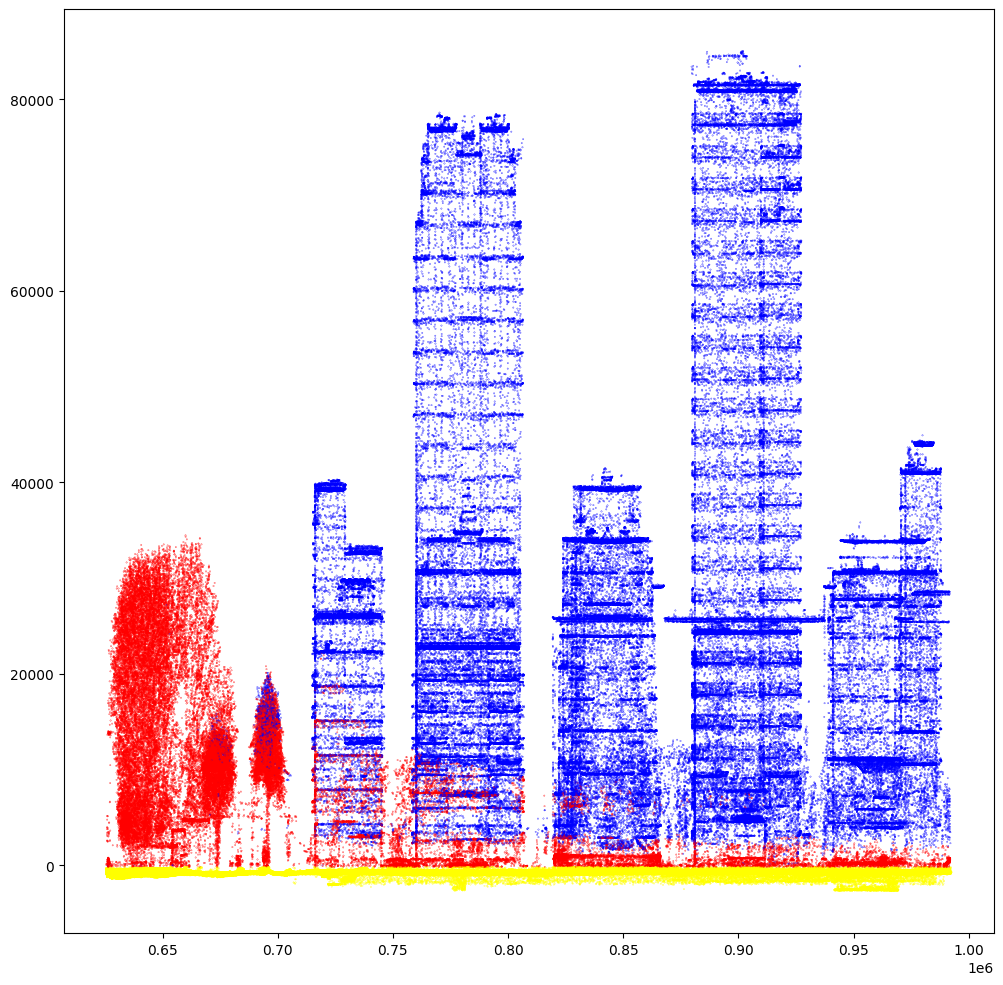

In [41]:
colors = {0:'yellow',1:'red',2:'blue',3:'green',4:'black'}
plt.figure(figsize=(12,12))
plt.scatter(X_test[:,0],X_test[:,2],c=pd.Series(y_pred).map(colors),s=0.05)
plt.show()

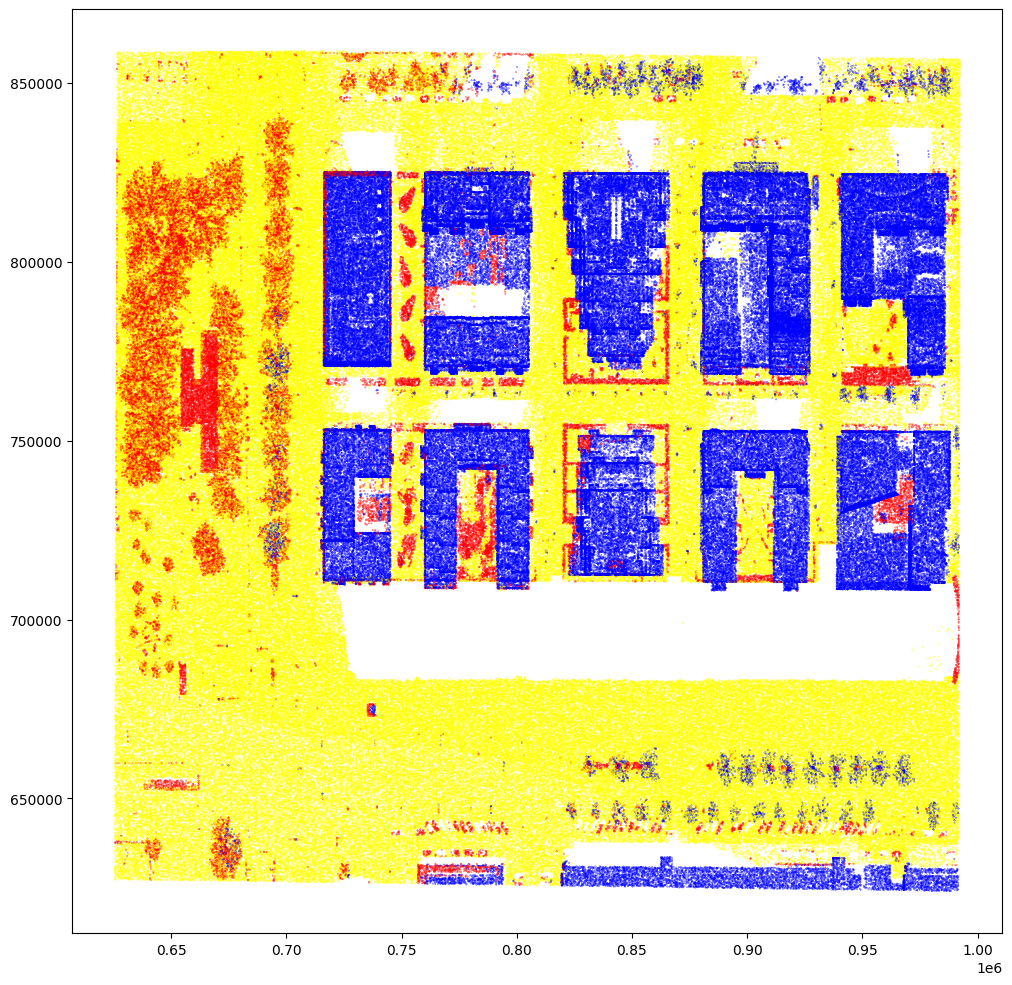

In [42]:
colors = {0:'yellow',1:'red',2:'blue',3:'green',4:'black'}
plt.figure(figsize=(12,12))
plt.scatter(X_test[:,0],X_test[:,1],c=pd.Series(y_pred).map(colors),s=0.05)
plt.show()